# **Scaling, Re-sizing, Interpolations and Cropping**

**In this lesson we'll learn:**
1. How to re-size and scale images
2. Image Pyramids
3. Cropping

re-sizing과 scaling의 비교


### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2022-09-19 02:16:52--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  6.75MB/s    in 4.2s    

2022-09-19 02:16:57 (6.75 MB/s) - ‘images.zip’ saved [29586716/29586716]



### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood

See more on their performance - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

In [6]:
# 이미지 가져오기
image = cv2.imread('images/oxfordlibrary.jpeg')
imshow("Scaling - Linear Interpolation", image)

# 보간법 없다 설정하면 디폴트 값으로 cv.INTER_LINEAR 사용
# 3/4로 크기를 바꾸자
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow('0.75x Scaling - Linear Interpolation',image_scaled)

#이미지를 두배 키우자
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# inter_nearest interpolation를 사용하여 이미지를 두배키우자
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

Output hidden; open in https://colab.research.google.com to view.

이미지의 축을 확인하면 숫자가 달라졌다. 보간법에의하여 이미지의 사이즈가 커지더라도 이미지를 깨짐없이 만들어 준다. 실제로 이미지의 사이즈가 변한것은 축을 보면 알수있으나 정의해놓은 imshow의 size=10 함수때문에 송출뒤는 크기는 같다.

## **Image Pyraminds**

 cv2.pyrDown 함수는 입력 이미지를 50% 크기로 줄인 이미지를 생성해 반환하고 cv2.pryUp은 입력 이미지를 200% 크기로 확대한 이미지를 생성해 반환합니다.

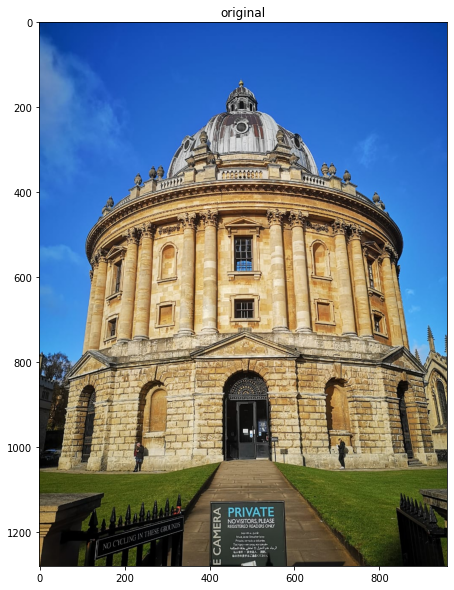

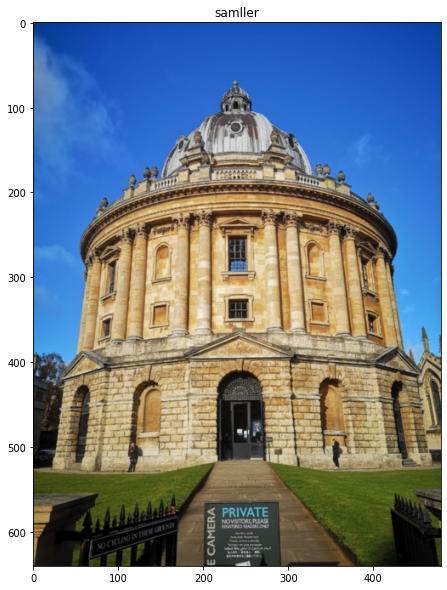

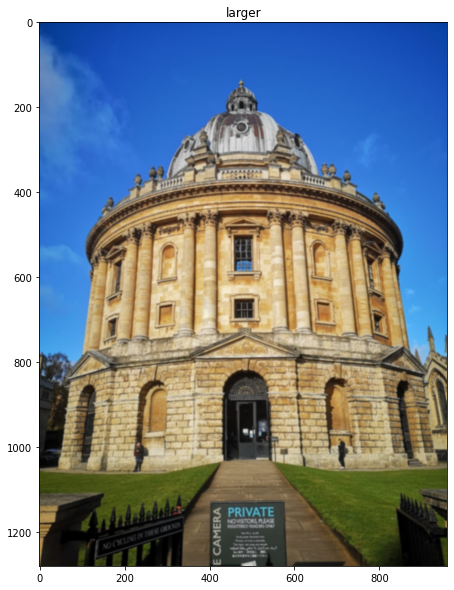

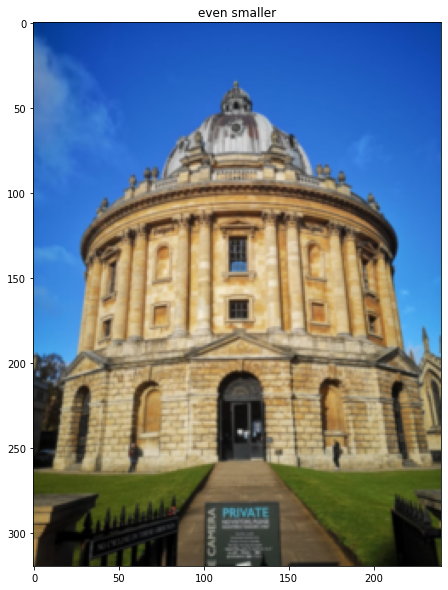

In [7]:
image = cv2.imread('images/oxfordlibrary.jpeg')
smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("original", image)
imshow("samller", smaller)
imshow("larger", larger)

even_smaller = cv2.pyrDown(smaller)
imshow('even smaller', even_smaller)

# **Cropping**

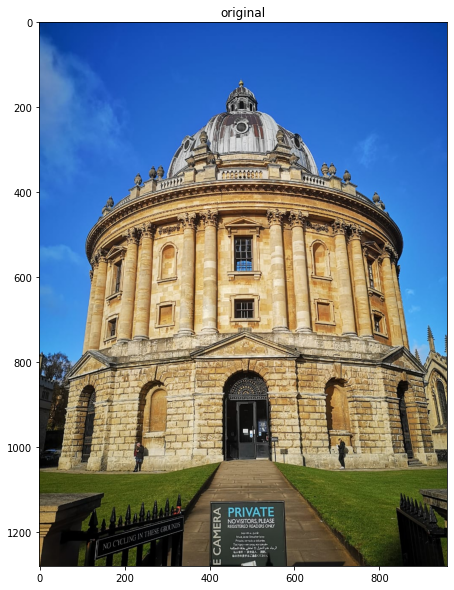

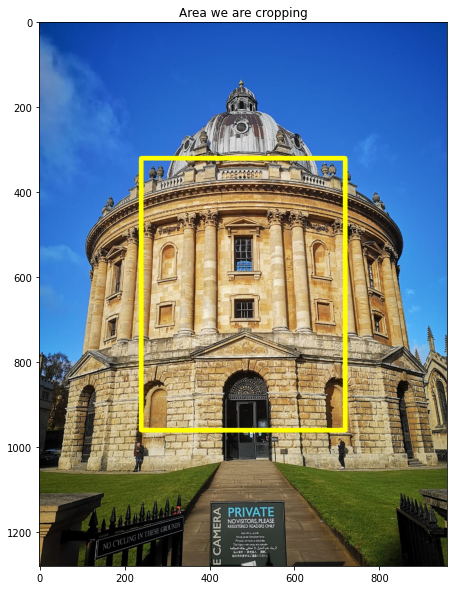

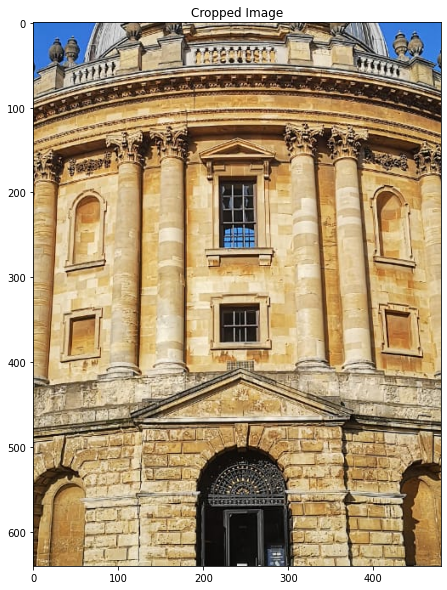

In [8]:
#이미지 가져오기
image = cv2.imread('images/oxfordlibrary.jpeg')

#이미지의 높이와 가로 가져오기
height, width = image.shape[:2]

imshow("original", image)

#크롭시킬 시작점
start_row, start_col = int(height * .25), int(width * .25 )
#크롭시킬 끝점
end_row, end_col = int(height * .75), int(width * .75)

# 원본이미지에서 크롭시킬 이미지 지정하기
cropped = image[start_row:end_row , start_col:end_col]

#사각형그려보기
copy = image.copy()
cv2.rectangle(copy,(start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are cropping", copy)

imshow("Cropped Image", cropped) 

